In [1]:
!git clone https://github.com/katsuma-inoue/transient_chaos_in_bert

Cloning into 'transient_chaos_in_bert'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 79 (delta 5), reused 74 (delta 3), pack-reused 0
Unpacking objects: 100% (79/79), done.


In [2]:
%cd transient_chaos_in_bert

/content/transient_chaos_in_bert


### install packages

For package dependency, we should downgrade numpy, so after run below command, please restart runtime.  

In [ ]:
!pip install -r requirements-gpu.txt

## Take sample record.

In [ ]:
import os
import sys
import numpy as np
sys.path.append(".")
os.environ["USE_BERT_ATTENTION_PROJECT"] = "0"  # Only use the output of Albert encoder layer.
# If you want to catch attention value of encoder layer, please set this value to "1".

from src.library.model.albert_system import AlbertSystem

max_seq_len = 128
max_step = 500

net = AlbertSystem("albert_large", version="2", seq_len=max_seq_len, pretrained_weights=True)

### Please input text below.
input_text = ["ALBERT stands for A Lite BERT (Bi-directional encoder representation from transformer).", "Hello"]
###


inputs, _ = net.tokenizer.tokenize_text(input_text, max_seq_len=max_seq_len, return_pieces=False)
for k, v in inputs.items():
  inputs[k] = np.array(v, dtype=np.int64).reshape(1, -1)

net.set_input(**inputs)
callback_gpu = lambda x: x
net_record = net.step(step_num=max_step, save_state=True, callback_gpu=callback_gpu)  # (max_step, 1, max_seq_len, 1024)

Fetching ALBERT model: albert_large version: 2
Already  fetched:  albert_large.tar.gz
already unpacked at: .models/albert_large-v2/albert_large
Done loading 23 BERT weights from: .models/albert_large-v2/albert_large into <bert.model.BertModelLayer object at 0x7f7b5d279c10> (prefix:albert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from saved model: 
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
Weights successfully have been loaded


visualize trajectory of ALBERT.

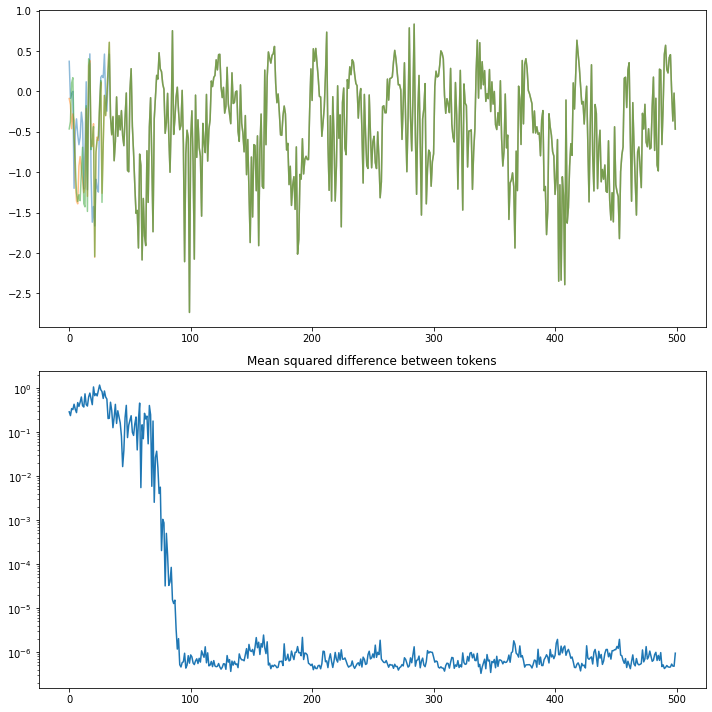

In [ ]:
import matplotlib.pyplot as plt

plot_step = 150
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
plt.plot(net_record[:plot_step, 0, :3, 5], alpha=0.5)  # compare the trajectories of the same dimension of the first three token vectors.


plt.subplot(2, 1, 2)
plt.title("Mean squared difference between tokens")
net_diff_squared = np.mean((net_record - net_record.mean(axis=-2, keepdims=True)) ** 2, axis=-2, keepdims=True)[:, 0, 0, 0]
net_diff = np.sqrt(net_diff_squared)
plt.plot(net_diff[:plot_step])
plt.yscale("log")
plt.tight_layout()

## Get very long time record.

If you want to the end of transient chaos > 100000 steps, you can run below script.

Note: It tooks about 1 hours to finish.

In [ ]:
import os
import sys
import numpy as np
sys.path.append(".")
os.environ["USE_BERT_ATTENTION_PROJECT"] = "0"  # Only use the output of Albert encoder layer.
# If you want to catch attention value of encoder layer, please set this value to "1".

from src.library.model.albert_system import AlbertSystem

max_seq_len = 16
max_step = 100000

net = AlbertSystem("albert_large", version="2", seq_len=max_seq_len, pretrained_weights=True)

### Please input text below. You can concatenate sentences up to two text.
input_text = ["ALBERT stands for A Lite BERT.", "Hello world!"]
###


inputs, _ = net.tokenizer.tokenize_text(input_text, max_seq_len=max_seq_len, return_pieces=False)
for k, v in inputs.items():
  inputs[k] = np.array(v, dtype=np.int64).reshape(1, -1)


net.set_input(**inputs)
callback_gpu = lambda x: x
net_record = net.step(step_num=max_step, save_state=True, callback_gpu=callback_gpu)  # (max_step, 1, max_seq_len, 1024)

Fetching ALBERT model: albert_large version: 2
Already  fetched:  albert_large.tar.gz
already unpacked at: .models/albert_large-v2/albert_large
Done loading 23 BERT weights from: .models/albert_large-v2/albert_large into <bert.model.BertModelLayer object at 0x7f7b6574d250> (prefix:albert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from saved model: 
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
Weights successfully have been loaded


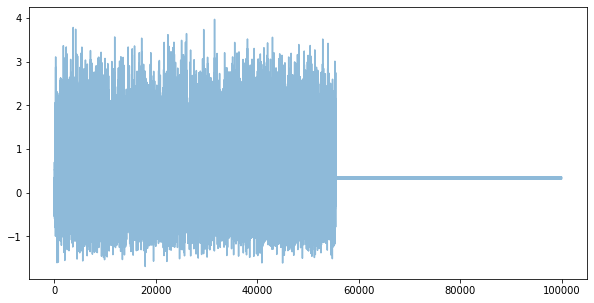

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
# plot the trajectory of the same dimension of the first three token vectors.
plt.plot(net_record[:, 0, 0, 0], alpha=0.5)  
